# hypo-2 자치구별 고령인구 비율이 높은 곳일수록 주요 문화시설의 비율이 높을 것이다.

## require library install

In [98]:
# !pip install folium
# !pip install googlemaps
# !pip install openpyxl
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

### library import

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc
import warnings
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


## data import

In [297]:
# 노령화 지수
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [298]:
old_pop = pd.read_excel('./data/자치구별+연령계층별+인구구성비(추계인구)_20241108190613.xlsx')
old_pop.head()

,자치구별(1),2023,2023.1,2023.2
0,자치구별(1),유소년인구,생산가능인구,고령인구
1,합계,9.1,72.8,18.1
2,종로구,7,74.1,18.9
3,중구,6.8,73.6,19.6
4,용산구,8.6,74.1,17.3


In [169]:
# # 공원, 전통시장 등
# park = pd.read_csv('./data/KC_ODSN_WALK_RECOMEND_LIST_2023.csv')
# park.head()

In [299]:
# 문화시설 (복지관 등)

culture = pd.read_csv('./data/KC_485_DMSTC_MCST_OLDLSR_2023.csv')
culture.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KC485PC23N000000000001,문화시설,복지관,1004가족복지센터,전라북도,익산시,5214011400,모현동1가,5214061000,모현동,...,126.946306,35.949725,NaN,NaN,9.500649e+05,1.772699e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
1,KC485PC23N000000000002,문화시설,복지관,1004가족재가복지센터,경기도,화성시,4159025325,봉담읍 와우리,4159025300,봉담읍,...,126.972771,37.215112,NaN,NaN,9.532215e+05,1.913051e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
2,KC485PC23N000000000003,문화시설,복지관,1004엔젤스방문요양센터,경기도,고양시 일산서구,4128710500,덕이동,4128760000,덕이동,...,126.751049,37.699774,NaN,NaN,9.339764e+05,1.966954e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
3,KC485PC23N000000000004,문화시설,복지관,100세고성재가복지센터,경상남도,고성군,4882025021,고성읍 성내리,4882025000,고성읍,...,128.321049,34.974063,NaN,NaN,1.074947e+06,1.664660e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
4,KC485PC23N000000000005,문화시설,복지관,100세노인복지센터,경상남도,진주시,4817012500,신안동,4817071500,신안동,...,128.071955,35.185477,NaN,NaN,1.052074e+06,1.687947e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [245]:
tour = pd.read_csv('./data/RB_SR_TURIST_TURSM_INFO_20221231.csv')
tour.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_2313/3793178725.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tour = pd.read_csv('./data/RB_SR_TURIST_TURSM_INFO_20221231.csv')


,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,CTPRVN_ENG_NM,SIGNGU_ENG_NM,CTPRVN_CHNLNG_NM,SIGNGU_CHNLNG_NM,CTPRVN_JLANG_NM,SIGNGU_JLANG_NM,CTPRVN_CD,SIGNGU_CD,FCLTY_LO,FCLTY_LA,HMPG_URL,TEL_NO,REGIST_DE
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,Gyeongsangbuk-do,Gimcheonsi,慶尙北道,金泉市,慶?北道（キョンサンブクト),金泉市(キムチョンシ),37,37030,129.471868,42.909408,NaN,NaN,20221231
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,Gyeongsangbuk-do,Yeongdeokgun,慶尙北道,盈德郡,慶?北道（キョンサンブクト),盈?郡（ヨンドクグン）,37,37350,129.471868,42.909408,NaN,NaN,20221231
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,Seoul,Junggu,首爾特別市,中區,ソウル特別市,中?（チュング）,11,11020,123.431472,41.805699,NaN,NaN,20221231
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,Gyeongsangbuk-do,Cheongdogun,慶尙北道,淸道郡,慶?北道（キョンサンブクト),?道郡（チョンドグン）,37,37360,123.431472,41.805699,NaN,NaN,20221231
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,Busan,Yeonjegu,釜山廣域市,蓮堤區,釜山（プサン）?域市,蓮堤?（ヨンジェグ）,21,21130,128.573767,38.194816,NaN,NaN,20221231


In [300]:
area = pd.read_excel('./data/행정구역(구별)_20241215143907.xlsx')
area.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.2,100,426,467,12926,96663
3,NaN,종로구,23.91,3.95,17,87,279,1475
4,NaN,중구,9.96,1.65,15,74,256,1568


## preprocessing

### old_point

In [173]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,구별,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


### park -- 폐기

In [174]:
# park = park[park['CTPRVN_NM'].str.contains('서울')]
# park.head()

In [175]:
# park.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
#                    'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
#                    'UPDT_DT', 'REGIST_DT'], inplace=True)
# park.reset_index(drop=True, inplace=True)
# park.head()

In [176]:
# park['SIGNGU_NM'].value_counts()

In [177]:
# park['MLSFC_NM'].value_counts()

In [178]:
# park['LCLAS_NM'].value_counts()

In [179]:
# park['SIGNGU_NM'].value_counts()

### old_pop

In [246]:
old_pop.drop(index=[0, 1], inplace=True)
old_pop.columns = ['구별', '유소년인구', '생산가능인구', '고령인구']
old_pop.reset_index(drop=True, inplace=True)
old_pop.head()

,구별,유소년인구,생산가능인구,고령인구
0,용산구,8.6,74.1,17.3
1,성동구,8.9,73.8,17.3
2,광진구,7.7,76.1,16.2
3,동대문구,8,73.2,18.8
4,중랑구,8.1,71.9,20


### culture

In [247]:
culture = culture[culture['CTPRVN_NM'].str.contains('서울')]
culture.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
17,KC485PC23N000000000018,문화시설,복지관,1318상상발전소,서울특별시,중랑구,1126010400,묵동,1126063000,묵2동,...,127.077072,37.606135,NaN,NaN,962670.272236,1.956385e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
18,KC485PC23N000000000019,문화시설,복지관,1318해피존,서울특별시,용산구,1117012800,한강로3가,1117062500,한강로동,...,126.956555,37.531929,NaN,NaN,951985.086624,1.948207e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
29,KC485PC23N000000000030,문화시설,복지관,153재가장기요양기관,서울특별시,중랑구,1126010100,면목동,1126057000,면목7동,...,127.083549,37.578477,NaN,NaN,963228.320845,1.953314e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
71,KC485PC23N000000000072,문화시설,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,1150010400,가양동,1150060400,가양2동,...,126.856279,37.564612,NaN,NaN,943150.174500,1.951889e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
102,KC485PC23N000000000103,문화시설,복지관,99팔팔재가노인복지센터,서울특별시,강서구,1150010300,화곡동,1150059100,화곡6동,...,126.854230,37.554832,NaN,NaN,942961.762211,1.950805e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [248]:
culture.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",
                        'BASE_DE', 'LCLAS_NM', 'ADSTRD_CD', 'LEGALDONG_NM', 'RDNMADR_CD', 'ADSTRD_NM', 'GID_CD', 
                        "ZIP_NO", "LC_LO", "LC_LA"], inplace=True)
culture.reset_index(drop=True, inplace=True)
culture.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [250]:
culture['MLSFC_NM'].value_counts()

MLSFC_NM
노인정/노인회관    1492
복지관         1195
보육원/양로원      318
마을/새마을회관      51
Name: count, dtype: int64

### tour

In [251]:
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,CTPRVN_ENG_NM,SIGNGU_ENG_NM,CTPRVN_CHNLNG_NM,SIGNGU_CHNLNG_NM,CTPRVN_JLANG_NM,SIGNGU_JLANG_NM,CTPRVN_CD,SIGNGU_CD,FCLTY_LO,FCLTY_LA,HMPG_URL,TEL_NO,REGIST_DE
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,Gyeongsangbuk-do,Gimcheonsi,慶尙北道,金泉市,慶?北道（キョンサンブクト),金泉市(キムチョンシ),37,37030,129.471868,42.909408,NaN,NaN,20221231
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,Gyeongsangbuk-do,Yeongdeokgun,慶尙北道,盈德郡,慶?北道（キョンサンブクト),盈?郡（ヨンドクグン）,37,37350,129.471868,42.909408,NaN,NaN,20221231
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,Seoul,Junggu,首爾特別市,中區,ソウル特別市,中?（チュング）,11,11020,123.431472,41.805699,NaN,NaN,20221231
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,Gyeongsangbuk-do,Cheongdogun,慶尙北道,淸道郡,慶?北道（キョンサンブクト),?道郡（チョンドグン）,37,37360,123.431472,41.805699,NaN,NaN,20221231
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,Busan,Yeonjegu,釜山廣域市,蓮堤區,釜山（プサン）?域市,蓮堤?（ヨンジェグ）,21,21130,128.573767,38.194816,NaN,NaN,20221231


In [252]:
tour.drop(columns=['CTPRVN_ENG_NM', 'SIGNGU_ENG_NM', 'CTPRVN_CHNLNG_NM', 'SIGNGU_CHNLNG_NM',
                   'CTPRVN_JLANG_NM', 'SIGNGU_JLANG_NM', 'CTPRVN_CD', 'SIGNGU_CD', 'HMPG_URL', 'TEL_NO', 'REGIST_DE'], inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,129.471868,42.909408
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,129.471868,42.909408
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,123.431472,41.805699
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,123.431472,41.805699
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,128.573767,38.194816


In [253]:
tour = tour[tour['CTPRVN_KLANG_NM'].str.contains('서울')]
tour.reset_index(drop=True, inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,123.431472,41.805699
1,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
2,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
3,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
4,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664


In [254]:
tour['FLAG_NM'].value_counts()

FLAG_NM
노인복지시설    3749
관광호텔       333
호스텔         96
가족호텔        21
소형호텔        10
벚꽃축제         2
Name: count, dtype: int64

### area

In [184]:
area.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.2,100,426,467,12926,96663
3,NaN,종로구,23.91,3.95,17,87,279,1475
4,NaN,중구,9.96,1.65,15,74,256,1568


In [185]:
area.drop(columns='자치구별(1)', index=[0,2], inplace=True)
area.columns = area.loc[1, :]
area.drop(index=1, inplace=True)
area.reset_index(drop=True, inplace=True)
area.head()

1,자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,256,1568
2,용산구,21.87,3.61,16,36,357,2599
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [186]:
area.rename(columns={"자치구별(2)" : '구별'}, inplace=True)
area.head()

1,구별,면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,256,1568
2,용산구,21.87,3.61,16,36,357,2599
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [187]:
area = area[['구별', '면적 (km²)', '구성비 (%)']]

In [188]:
area.head()

1,구별,면적 (km²),구성비 (%)
0,종로구,23.91,3.95
1,중구,9.96,1.65
2,용산구,21.87,3.61
3,성동구,16.82,2.78
4,광진구,17.06,2.82


### merge to culture & tour

In [125]:
print(f"culture_seoul_dataframe rows = {culture.shape[0]}")
print(f"tour_seoul_dataframe rows = {tour.shape[0]}")

culture_seoul_dataframe rows = 3056
tour_seoul_dataframe rows = 4211


In [126]:
culture.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [127]:
tour = tour[tour['FLAG_NM'] == '노인복지시설']
tour.reset_index(drop=True, inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


In [128]:
tour.rename(columns={'FLAG_NM' : "MLSFC_NM", "CTPRVN_KLANG_NM" : "CTPRVN_NM", "SIGNGU_KLANG_NM":"SIGNGU_NM"}, inplace=True)
tour.head()

,MLSFC_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


#### merge

In [129]:
culture.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [130]:
tour.head()

,MLSFC_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


In [131]:
culture.shape, tour.shape

((3056, 7), (3749, 7))

In [132]:
facility = pd.concat([culture, tour], ignore_index=True)
facility.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [133]:
facility.drop_duplicates(inplace=True)
facility.reset_index(drop=True, inplace=True)
facility.shape

(6796, 7)

In [134]:
facility.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [135]:
# null 값 63행 확인
facility[facility['FCLTY_LO'].isna() | facility['FCLTY_LA'].isna()]

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
6733,노인복지시설,대청3단지경로당,서울특별시,강남구,서울특별시 강남구 개포동,NaN,NaN
6734,노인복지시설,포이경로당,서울특별시,강남구,서울특별시 강남구 개포동,NaN,NaN
6735,노인복지시설,개포3단지(아)경로당,서울특별시,강남구,서울특별시 강남구 개포동 138번지,NaN,NaN
6736,노인복지시설,개포경로당,서울특별시,강남구,서울특별시 강남구 개포동 169-3번지,NaN,NaN
6737,노인복지시설,이화경로당,서울특별시,강남구,서울특별시 강남구 개포동 181번지,NaN,NaN
...,...,...,...,...,...,...,...
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울특별시 성동구 행당동 147번지,NaN,NaN
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,"서울특별시 성동구 행당동 201 201동 105,106호",NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울특별시 종로구 명륜4가 206-8번지,NaN,NaN
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울특별시 종로구 효제동 173-2번지,NaN,NaN


#### api

* 주소를 좌표로 번경하기

* https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [136]:
import requests
import json

def convert_address(address):
    
    path = '/v2/local/search/address.json'
    api_host = 'https://dapi.kakao.com'
    api_key = '275fa9c9b83625900bee1dc000fd7dcb'
    url = api_host+path
    
    header = {
        "Authorization" : f'KakaoAK {api_key}'
    }
    
    body = {
    "format" : "json",
    'query' : address
    }

    try:
        response = requests.get(url=url, params=body, headers=header, timeout=10)  # 10초 타임아웃
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
    except requests.exceptions.Timeout:
        print("Request timed out")
        return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

    parsed_data = json.loads(response.text)

    return parsed_data

In [137]:
parsed_data = convert_address('서울특별시 강서구 화곡동 공항대로 426')

In [138]:
# road_address
parsed_data['documents'][0]['road_address']['address_name']

'서울 강서구 공항대로 426'

In [139]:
# x position
parsed_data['documents'][0]['road_address']['x']

'126.854229652711'

In [140]:
# y position
parsed_data['documents'][0]['road_address']['y']

'37.5548319100792'

In [141]:
facility.iloc[44]

MLSFC_NM                     노인정/노인회관
FCLTY_NM                       가리봉경로당
CTPRVN_NM                       서울특별시
SIGNGU_NM                         구로구
RDNMADR_NM    서울특별시 구로구 가리봉동 우마1다길 25
FCLTY_LO                   126.889745
FCLTY_LA                    37.482934
Name: 44, dtype: object

In [142]:
addr_list = []
x_list = []
y_list = []
null_indexs = {
    'addr_idx' : [],
    'x_idx' : [],
    'y_idx' : []
}
for idx, val in facility.iterrows():
    data = val['RDNMADR_NM']
    parsed_data = convert_address(data)
    try:
        addr = parsed_data['documents'][0]['road_address']['address_name']
    except:
        addr = val['RDNMADR_NM']
        null_indexs['addr_idx'].append(idx)
    try:
        x = parsed_data['documents'][0]['road_address']['x']
    except:
        x = val['FCLTY_LO']
        null_indexs['x_idx'].append(idx)
    try:
        y = parsed_data['documents'][0]['road_address']['y']
    except:
        y = val['FCLTY_LA']
        null_indexs['y_idx'].append(idx)
        
    addr_list.append(addr)
    x_list.append(x)
    y_list.append(y)

KeyboardInterrupt: 

In [45]:
len(null_indexs['addr_idx']), len(null_indexs['x_idx']), len(null_indexs['y_idx'])

(1169, 1169, 1169)

In [46]:
len(addr_list)

6796

In [47]:
same_idx = (null_indexs['addr_idx'] == null_indexs['x_idx'] == null_indexs['y_idx'])
same_idx

True

In [48]:
addr_list[-5:], x_list[-5:], y_list[-5:]

(['서울 성동구 왕십리로 278-17',
  '서울특별시 성동구 행당동 201 201동 105,106호',
  '서울 종로구 창경궁로26길 7',
  '서울 종로구 종로35가길 19',
  '서울 중랑구 면목로35길 63'],
 ['127.037851167361',
  nan,
  '126.998136394522',
  '127.005031333474',
  '127.081978831132'],
 ['37.5592483612854',
  nan,
  '37.5818949849387',
  '37.5720611697886',
  '37.5785997107848'])

In [51]:
facility['RDNMADR_NM'] = addr_list
facility['FCLTY_LO'] = x_list
facility['FCLTY_LA'] = y_list

facility.tail()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울 성동구 왕십리로 278-17,127.037851167361,37.5592483612854
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,"서울특별시 성동구 행당동 201 201동 105,106호",NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울 종로구 창경궁로26길 7,126.998136394522,37.5818949849387
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울 종로구 종로35가길 19,127.005031333474,37.5720611697886
6795,노인복지시설,"두산4,5단지 경로당",서울특별시,중랑구,서울 중랑구 면목로35길 63,127.081978831132,37.5785997107848


In [52]:
facility2 = facility.iloc[null_indexs['addr_idx']]
facility2.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
44,노인정/노인회관,가리봉경로당,서울특별시,구로구,서울특별시 구로구 가리봉동 우마1다길 25,126.889745,37.482934
46,노인정/노인회관,가리봉제1동경로당,서울특별시,구로구,서울특별시 구로구 가리봉동 우마1다길 25,126.889678,37.482897
84,노인정/노인회관,갈산경로당,서울특별시,양천구,서울특별시 양천구 신정동,126.854354,37.518553
116,복지관,강동구립장애인종합복지관(2024년3월예정),서울특별시,강동구,서울특별시 강동구 천호동,127.128669,37.542222
225,노인정/노인회관,계성경로당,서울특별시,도봉구,서울특별시 도봉구 쌍문동,127.029191,37.651319


In [70]:
facility2.shape

(1169, 7)

#### api 2

* 위도 / 경도를 가지고 주소로 변환

https://developers.kakao.com/docs/latest/ko/local/dev-guide#coord-to-address

https://dapi.kakao.com/v2/local/geo/coord2address.${FORMAT}	

In [53]:
import requests
import json

def coord_to_address(lo, la, input_coord = 'WGS84'):
    
    path = '/v2/local/geo/coord2address.json'
    api_host = 'https://dapi.kakao.com'
    api_key = '275fa9c9b83625900bee1dc000fd7dcb'
    url = api_host+path
    
    header = {
        "Authorization" : f'KakaoAK {api_key}'
    }
    
    body = {
    "format" : "json",
    'x' : lo,
    'y' : la,
    'input_coord' : input_coord
    }

    try:
        response = requests.get(url=url, params=body, headers=header, timeout=10)  # 10초 타임아웃
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
    except requests.exceptions.Timeout:
        print("Request timed out")
        return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

    parsed_data = json.loads(response.text)

    return parsed_data

In [54]:
double_address_idx = []
addr2_list = []
null_indexs2 = []
none_indexs2 = []

for idx, val in facility2.iterrows():
    lo_x = val['FCLTY_LO']
    la_y = val['FCLTY_LA']
    
    if np.isnan(lo_x) or np.isnan(la_y):
        null_indexs2.append(idx)
        pass
        
    else:
        lo_x = round(lo_x, 6)
        la_y = round(la_y, 6)
        addr2 = val['RDNMADR_NM']
        parsed_data2 = coord_to_address(lo_x, la_y)
 
        if 'meta' in parsed_data2:
            total_count = parsed_data2['meta'].get('total_count', 0)

            if total_count == 0:
                null_indexs2.append(idx)

            elif total_count == 1:
                if parsed_data2['documents'][0].get('road_address', 0) == None:
                    none_indexs2.append(idx)
                    
                else:
                    addr2 = parsed_data2['documents'][0]['road_address']['address_name']
                    
            else:
                double_address_idx.append(idx)
                
        else:
            null_indexs2.append(idx)
                
    addr2_list.append(addr2)

In [55]:
len(double_address_idx), len(addr2_list), len(null_indexs2), len(none_indexs2)

(0, 1169, 31, 328)

In [56]:
addr2_list[:5], null_indexs2[:5], none_indexs2[:5]

(['서울특별시 구로구 우마1가길 13-9',
  '서울특별시 구로구 우마1가길 13-9',
  '서울특별시 양천구 중앙로32길 1',
  '서울특별시 강동구 구천면로33길 43-7',
  '서울특별시 도봉구 시루봉로 8'],
 [5997, 5998, 6000, 6001, 6730],
 [287, 289, 352, 398, 417])

In [57]:
facility.loc[null_indexs['addr_idx'], ['RDNMADR_NM']] = addr2_list
facility3 = facility.loc[(facility.index.isin(null_indexs2)) | (facility.index.isin(none_indexs2))]
facility3

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
287,노인정/노인회관,광진구용마경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
289,노인정/노인회관,광진구중곡4동경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
352,노인정/노인회관,구립당곡경로당,서울특별시,양천구,서울특별시 양천구 신월동 오목로9길 20-1,126.842883,37.524123
398,노인정/노인회관,구립신정4동제1경로당,서울특별시,양천구,서울특별시 양천구 신정동 오목로46길 9,126.861918,37.524916
417,노인정/노인회관,구립웃말경로당,서울특별시,강동구,서울특별시 강동구 성내동 천호대로162길 72,127.127536,37.53374
...,...,...,...,...,...,...,...
6786,노인복지시설,삼개경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN
6788,노인복지시설,쌈지경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN
6789,노인복지시설,구룡경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN
6790,노인복지시설,새마을경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN


In [58]:
coord_to_address(127.090401, 37.561748)

{'meta': {'total_count': 1},
 'documents': [{'road_address': None,
   'address': {'address_name': '서울 광진구 중곡동 143-119',
    'region_1depth_name': '서울',
    'region_2depth_name': '광진구',
    'region_3depth_name': '중곡동',
    'mountain_yn': 'N',
    'main_address_no': '143',
    'sub_address_no': '119',
    'zip_code': ''}}]}

In [59]:
coord_to_address(126.889745, 37.482934)

{'meta': {'total_count': 1},
 'documents': [{'road_address': {'address_name': '서울특별시 구로구 우마1가길 13-9',
    'region_1depth_name': '서울',
    'region_2depth_name': '구로구',
    'region_3depth_name': '',
    'road_name': '우마1가길',
    'underground_yn': 'N',
    'main_building_no': '13',
    'sub_building_no': '9',
    'building_name': '가리봉1동 복지관',
    'zone_no': '08383'},
   'address': {'address_name': '서울 구로구 가리봉동 111-1',
    'region_1depth_name': '서울',
    'region_2depth_name': '구로구',
    'region_3depth_name': '가리봉동',
    'mountain_yn': 'N',
    'main_address_no': '111',
    'sub_address_no': '1',
    'zip_code': ''}}]}

In [68]:
facility3.to_csv('./data/facility_output.csv', encoding="cp949")

In [75]:
facility3_edit = pd.read_csv('./data/facility_output_edit.csv', encoding='cp949', index_col=0)
facility3_edit.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
287,노인정/노인회관,광진구용마경로당,서울특별시,광진구,서울 광진구 용마산로31길 38-8 (중곡동),127.090401,37.561748
289,노인정/노인회관,광진구중곡4동경로당,서울특별시,광진구,서울 광진구 긴고랑로39길 57 광진구중곡4동경로당,127.090401,37.561748
352,노인정/노인회관,구립당곡경로당,서울특별시,양천구,서울 양천구 오목로9길 20-1,126.842883,37.524123
398,노인정/노인회관,구립신정4동제1경로당,서울특별시,양천구,서울 양천구 오목로46길 9,126.861918,37.524916
417,노인정/노인회관,구립웃말경로당,서울특별시,강동구,서울 강동구 천호대로162길 72,127.127536,37.533740


In [79]:
drop_index = facility3_edit[facility3_edit['RDNMADR_NM'].str.contains("서울특별시")].index

In [81]:
drop_index

Index([ 449,  903, 1036, 1586, 1672, 1675, 1746, 2041, 2331, 2569,
       ...
       6761, 6771, 6773, 6776, 6777, 6780, 6784, 6789, 6790, 6792],
      dtype='int64', length=207)

In [92]:
facility['MLSFC_NM'].value_counts()

MLSFC_NM
노인복지시설      3740
노인정/노인회관    1492
복지관         1195
보육원/양로원      318
마을/새마을회관      51
Name: count, dtype: int64

In [94]:
facility[facility['MLSFC_NM'] == '노인복지시설']

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
3056,노인복지시설,한신아파트경로당,서울특별시,도봉구,서울 도봉구 마들로 859-19,127.046764720981,37.6860418285068
3057,노인복지시설,하계경로당,서울특별시,노원구,서울 노원구 공릉로58마길 7,127.076628483903,37.6367704628035
3058,노인복지시설,서원아파트경로당,서울특별시,도봉구,서울특별시 도봉구 도봉산4길 28-3,127.042773,37.688896
3059,노인복지시설,서광아파트경로당,서울특별시,도봉구,서울 도봉구 마들로 770,127.050128939851,37.6790159706909
3060,노인복지시설,약수경로당,서울특별시,도봉구,서울 도봉구 시루봉로23가길 17,127.039316003076,37.6723236332028
...,...,...,...,...,...,...,...
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울 성동구 왕십리로 278-17,127.037851167361,37.5592483612854
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,서울특별시 강남구 세곡동,NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울 종로구 창경궁로26길 7,126.998136394522,37.5818949849387
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울 종로구 종로35가길 19,127.005031333474,37.5720611697886


In [117]:
facility.loc[facility3_edit.index, ['FCLTY_NM']] = facility3_edit['FCLTY_NM']
facility.loc[facility3_edit.index, ['RDNMADR_NM']] = facility3_edit['RDNMADR_NM']
facility.loc[facility3_edit.index, ['SIGNGU_NM']] = facility3_edit['SIGNGU_NM']

In [122]:
facility.drop(index=drop_index, inplace=True)

In [125]:
facility.to_csv("./data/facility.csv", encoding='cp949')

In [127]:
fin = pd.read_csv('./data/facility.csv', index_col=0, encoding='cp949')

In [130]:
fin['RDNMADR_NM'].value_counts()

RDNMADR_NM
서울 송파구 양재대로 1218      7
서울특별시 마포구 하늘공원로 86    7
서울 강서구 방화대로48길 40     7
서울 은평구 갈현로11길 30      6
서울 관악구 난곡로 55         6
                     ..
서울 서초구 논현로31길 9       1
서울 도봉구 우이천로38마길 19    1
서울 광진구 뚝섬로48길 46      1
서울 광진구 동일로2길 17       1
서울 중랑구 면목로35길 63      1
Name: count, Length: 4515, dtype: int64

In [132]:
fin.drop_duplicates(subset=['RDNMADR_NM'], inplace=True)

In [135]:
fin.reset_index(inplace=True)

In [136]:
fin.to_csv('./data/final_facility.csv', encoding='cp949')

#### api 3

In [60]:
import requests
import json

def convert_name(name):
    
    path = '/v2/local/search/keyword.json'
    api_host = 'https://dapi.kakao.com'
    api_key = '275fa9c9b83625900bee1dc000fd7dcb'
    url = api_host+path
    
    header = {
        "Authorization" : f'KakaoAK {api_key}'
    }
    
    body = {
    "format" : "json",
    'query' : name
    }

    try:
        response = requests.get(url=url, params=body, headers=header, timeout=10)  # 10초 타임아웃
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
    except requests.exceptions.Timeout:
        print("Request timed out")
        return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

    parsed_data = json.loads(response.text)

    return parsed_data

In [61]:
convert_name('광진구용마경로당')

{'documents': [{'address_name': '서울 광진구 중곡동 169-81',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 친목 > 노인정,노인회',
   'distance': '',
   'id': '23888627',
   'phone': '',
   'place_name': '용마경로당',
   'place_url': 'http://place.map.kakao.com/23888627',
   'road_address_name': '',
   'x': '127.08457311443',
   'y': '37.5682896911163'},
  {'address_name': '서울 중랑구 면목동 619-7',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 친목 > 노인정,노인회',
   'distance': '',
   'id': '24012527',
   'phone': '',
   'place_name': '면목7동구립용마경로당',
   'place_url': 'http://place.map.kakao.com/24012527',
   'road_address_name': '서울 중랑구 면목로40길 23',
   'x': '127.088447735539',
   'y': '37.5788465085427'},
  {'address_name': '서울 중랑구 면목동 494',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 친목 > 노인정,노인회',
   'distance': '',
   'id': '10619017',
   'phone': '',
   'place_name': '용마금호어울림 노인회',
   'pl

In [62]:
facility3.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
287,노인정/노인회관,광진구용마경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
289,노인정/노인회관,광진구중곡4동경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
352,노인정/노인회관,구립당곡경로당,서울특별시,양천구,서울특별시 양천구 신월동 오목로9길 20-1,126.842883,37.524123
398,노인정/노인회관,구립신정4동제1경로당,서울특별시,양천구,서울특별시 양천구 신정동 오목로46길 9,126.861918,37.524916
417,노인정/노인회관,구립웃말경로당,서울특별시,강동구,서울특별시 강동구 성내동 천호대로162길 72,127.127536,37.53374


In [63]:
facility3['FCLTY_NM']

287        광진구용마경로당
289      광진구중곡4동경로당
352         구립당곡경로당
398     구립신정4동제1경로당
417         구립웃말경로당
           ...     
6786          삼개경로당
6788          쌈지경로당
6789          구룡경로당
6790         새마을경로당
6792    행당한신 제2 경로당
Name: FCLTY_NM, Length: 359, dtype: object

In [64]:
for idx, val in facility3.iterrows():
    print(idx, val)
    break

287 MLSFC_NM           노인정/노인회관
FCLTY_NM           광진구용마경로당
CTPRVN_NM             서울특별시
SIGNGU_NM               광진구
RDNMADR_NM    서울특별시 광진구 중곡동
FCLTY_LO         127.090401
FCLTY_LA          37.561748
Name: 287, dtype: object


In [65]:
val['FCLTY_NM']

'광진구용마경로당'

In [66]:
facility3

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
287,노인정/노인회관,광진구용마경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
289,노인정/노인회관,광진구중곡4동경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
352,노인정/노인회관,구립당곡경로당,서울특별시,양천구,서울특별시 양천구 신월동 오목로9길 20-1,126.842883,37.524123
398,노인정/노인회관,구립신정4동제1경로당,서울특별시,양천구,서울특별시 양천구 신정동 오목로46길 9,126.861918,37.524916
417,노인정/노인회관,구립웃말경로당,서울특별시,강동구,서울특별시 강동구 성내동 천호대로162길 72,127.127536,37.53374
...,...,...,...,...,...,...,...
6786,노인복지시설,삼개경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN
6788,노인복지시설,쌈지경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN
6789,노인복지시설,구룡경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN
6790,노인복지시설,새마을경로당,서울특별시,마포구,서울특별시 강남구 세곡동,NaN,NaN


In [104]:
addr_list = []
x_list = []
y_list = []
name_list = []
null_list = []

for idx, val in facility3.iterrows():
    name = val['FCLTY_NM']
    convert = convert_name(name)

    if convert.get('documents') == []:
        null_list.append(idx)
        continue
    
    elif convert['documents'][0].get('road_address_name') == '':
        c_addr = convert['documents'][0].get('address_name')
        addr_list.append(c_addr)
    else:
        c_addr = convert['documents'][0].get('road_address_name')
        addr_list.append(c_addr)

    c_x = convert['documents'][0].get('x')
    c_y = convert['documents'][0].get('y')
    c_name = convert['documents'][0].get('place_name')

    x_list.append(x)
    y_list.append(y)
    name_list.append(c_name)
    

addr_list[:5], x_list[:5], y_list[:5], name_list[:5]

(['서울 광진구 중곡동 169-81',
  '서울 광진구 긴고랑로39길 57',
  '서울 성동구 독서당로47가길 16-19',
  '부산 사하구 윤공단로 25-3',
  '서울 성북구 삼양로2길 55'],
 ['127.081978831132',
  '127.081978831132',
  '127.081978831132',
  '127.081978831132',
  '127.081978831132'],
 ['37.5785997107848',
  '37.5785997107848',
  '37.5785997107848',
  '37.5785997107848',
  '37.5785997107848'],
 ['용마경로당', '광진구중곡4동경로당', '성동구 구립 금강경로당', '기쁨재가복지센터', '길음데이케어센터'])

In [106]:
len(null_list)

161

In [107]:
convert_name('50플러스 센터')

{'documents': [{'address_name': '서울 서초구 염곡동 180-11',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 단체,협회 > 사회복지시설 > 노인복지시설',
   'distance': '',
   'id': '1141520450',
   'phone': '02-579-5060',
   'place_name': '서초50플러스센터',
   'place_url': 'http://place.map.kakao.com/1141520450',
   'road_address_name': '서울 서초구 염곡말길 9',
   'x': '127.05118099910582',
   'y': '37.46192017245296'},
  {'address_name': '서울 노원구 상계동 181-14',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 단체,협회 > 사회복지시설 > 노인복지시설',
   'distance': '',
   'id': '1722920230',
   'phone': '02-930-5060',
   'place_name': '노원50플러스센터',
   'place_url': 'http://place.map.kakao.com/1722920230',
   'road_address_name': '서울 노원구 노원로30길 73',
   'x': '127.070719943939',
   'y': '37.6561199808309'},
  {'address_name': '서울 강서구 등촌동 685',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 단체,협회 > 사회복지시설',
   'distance':

In [108]:
convert_name('중장년일자리희망센터')

{'documents': [{'address_name': '경남 창원시 성산구 신월동 100-1',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '서비스,산업 > 전문대행 > 직업소개,인력파견',
   'distance': '',
   'id': '789752070',
   'phone': '055-286-8317',
   'place_name': '중장년일자리희망센터',
   'place_url': 'http://place.map.kakao.com/789752070',
   'road_address_name': '경남 창원시 성산구 중앙대로228번길 6',
   'x': '128.688424900112',
   'y': '35.2324334322995'},
  {'address_name': '강원특별자치도 원주시 단구동 1516-6',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '서비스,산업 > 전문대행 > 직업소개,인력파견',
   'distance': '',
   'id': '1805036114',
   'phone': '033-735-0971',
   'place_name': '중장년일자리희망센터',
   'place_url': 'http://place.map.kakao.com/1805036114',
   'road_address_name': '강원특별자치도 원주시 남원로 528',
   'x': '127.947024432529',
   'y': '37.3311285241318'},
  {'address_name': '부산 부산진구 양정동 353-12',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 단체,협회',
   'distance': '

In [109]:
convert_name('노인일자리센터')

{'documents': [{'address_name': '전북특별자치도 전주시 완산구 중화산동2가 266-13',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 단체,협회 > 사회복지시설 > 노인복지시설',
   'distance': '',
   'id': '331946821',
   'phone': '063-255-9113',
   'place_name': '전북노인일자리센터',
   'place_url': 'http://place.map.kakao.com/331946821',
   'road_address_name': '전북특별자치도 전주시 완산구 백제대로 342',
   'x': '127.12328479254643',
   'y': '35.82371908463484'},
  {'address_name': '경남 김해시 흥동 415-4',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관 > 고용노동부',
   'distance': '',
   'id': '10197436',
   'phone': '055-323-6588',
   'place_name': '김해노인일자리창출지원센터',
   'place_url': 'http://place.map.kakao.com/10197436',
   'road_address_name': '경남 김해시 흥동로 150',
   'x': '128.864971336254',
   'y': '35.2220226026637'},
  {'address_name': '경북 구미시 도량동 741-4',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관 > 고용노동부',
   'di

## visualization

### facility

In [225]:
fin = pd.read_csv('./data/final_facility.csv', encoding='cp949', index_col=0)
fin.head()

,MLSFC_NM,FCLTY_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,중랑구,서울 중랑구 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,용산구,서울 용산구 청파로 46,126.956554,37.531929
2,복지관,153재가장기요양기관,중랑구,서울 중랑구 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,강서구,서울 강서구 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,강서구,서울 강서구 공항대로 426,126.854230,37.554832


In [226]:
order = fin['SIGNGU_NM'].value_counts().sort_values(ascending=False).index
order

Index(['노원구', '강서구', '구로구', '성북구', '영등포구', '양천구', '송파구', '은평구', '도봉구', '마포구',
       '강남구', '성동구', '중랑구', '강동구', '동대문구', '서초구', '관악구', '동작구', '서대문구', '강북구',
       '용산구', '종로구', '광진구', '금천구', '중구'],
      dtype='object', name='SIGNGU_NM')

In [227]:
fin_count = fin['SIGNGU_NM'].value_counts().to_frame().reset_index()
fin_count.head()

,SIGNGU_NM,count
0,노원구,306
1,강서구,267
2,구로구,239
3,성북구,225
4,영등포구,222


In [228]:
area.head()

1,구별,면적 (km²),구성비 (%)
0,종로구,23.91,3.95
1,중구,9.96,1.65
2,용산구,21.87,3.61
3,성동구,16.82,2.78
4,광진구,17.06,2.82


In [229]:
merged_facility = pd.merge(left=fin_count, right=area, left_on='SIGNGU_NM', right_on='구별', how='left')
merged_facility.drop(columns='구별', inplace=True)
merged_facility.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%)
0,노원구,306,35.44,5.86
1,강서구,267,41.45,6.85
2,구로구,239,20.12,3.32
3,성북구,225,24.58,4.06
4,영등포구,222,24.55,4.06


In [230]:
merged_facility = pd.merge(left=merged_facility, right=old_pop, left_on='SIGNGU_NM', right_on='구별', how='left')
merged_facility.drop(columns='구별', inplace=True)
merged_facility.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%),유소년인구,생산가능인구,고령인구
0,노원구,306,35.44,5.86,9.6,71.5,18.9
1,강서구,267,41.45,6.85,9.2,73,17.7
2,구로구,239,20.12,3.32,8.8,71.4,19.8
3,성북구,225,24.58,4.06,9.3,72.6,18.1
4,영등포구,222,24.55,4.06,8.4,73.8,17.8


In [231]:
merged_facility = pd.merge(left=merged_facility, right=old_point, left_on='SIGNGU_NM', right_on='구별', how='left')
merged_facility.drop(columns='구별', inplace=True)
merged_facility.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%),유소년인구,생산가능인구,고령인구,합계,남자,여자
0,노원구,306,35.44,5.86,9.6,71.5,18.9,196,161.5,232.9
1,강서구,267,41.45,6.85,9.2,73,17.7,192.5,166,220.3
2,구로구,239,20.12,3.32,8.8,71.4,19.8,224,198.5,250.7
3,성북구,225,24.58,4.06,9.3,72.6,18.1,193.5,163.6,224.6
4,영등포구,222,24.55,4.06,8.4,73.8,17.8,210.7,184.9,238


In [232]:
merged_facility.drop(columns=['유소년인구', '생산가능인구', '남자', '여자'], inplace=True)

In [233]:
merged_facility['ratio'] = merged_facility['count'] / merged_facility['면적 (km²)']
merged_facility.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%),고령인구,합계,ratio
0,노원구,306,35.44,5.86,18.9,196,8.634312
1,강서구,267,41.45,6.85,17.7,192.5,6.441496
2,구로구,239,20.12,3.32,19.8,224,11.878728
3,성북구,225,24.58,4.06,18.1,193.5,9.153784
4,영등포구,222,24.55,4.06,17.8,210.7,9.04277


In [234]:
merged_facility.rename(columns={"count" : "개수","합계":"고령화지수", "ratio" : "면적 당 개수"}, inplace=True)
merged_facility.head()

,SIGNGU_NM,개수,면적 (km²),구성비 (%),고령인구,고령화지수,면적 당 개수
0,노원구,306,35.44,5.86,18.9,196,8.634312
1,강서구,267,41.45,6.85,17.7,192.5,6.441496
2,구로구,239,20.12,3.32,19.8,224,11.878728
3,성북구,225,24.58,4.06,18.1,193.5,9.153784
4,영등포구,222,24.55,4.06,17.8,210.7,9.04277


In [235]:
merged_facility.iloc[:, 1:].corr()

,개수,면적 (km²),구성비 (%),고령인구,고령화지수,면적 당 개수
개수,1.000000,0.495488,0.495625,-0.038442,-0.415321,0.240638
면적 (km²),0.495488,1.000000,0.999999,-0.302931,-0.480276,-0.669535
구성비 (%),0.495625,0.999999,1.000000,-0.303011,-0.480015,-0.669411
고령인구,-0.038442,-0.302931,-0.303011,1.000000,0.735472,0.232609
고령화지수,-0.415321,-0.480276,-0.480015,0.735472,1.000000,0.077004
면적 당 개수,0.240638,-0.669535,-0.669411,0.232609,0.077004,1.000000


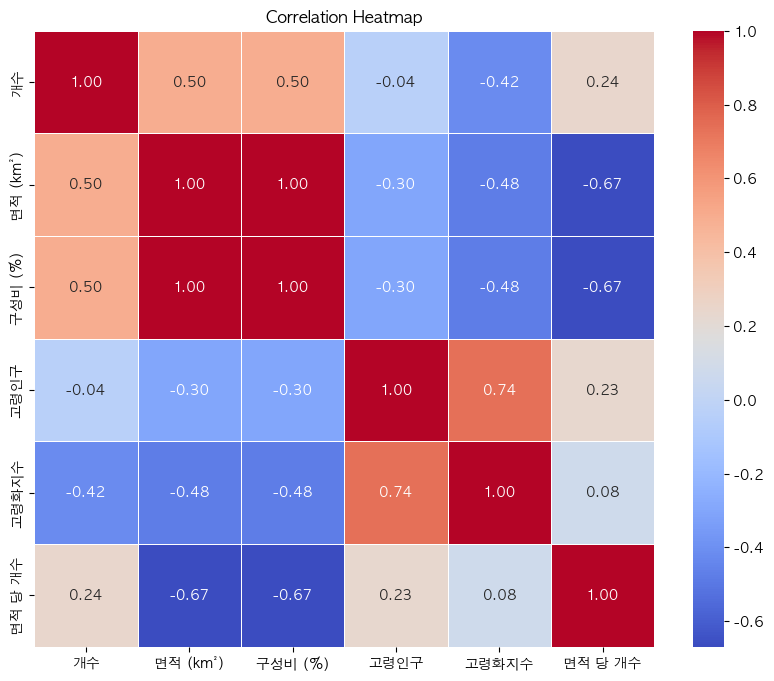

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation = merged_facility.iloc[:, 1:].corr()

# Heatmap 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [237]:
merged_facility['고령인구'] = merged_facility['고령인구'].astype(float)
merged_facility['면적 당 개수'] = merged_facility['면적 당 개수'].astype(float)

In [238]:
from scipy.stats import pearsonr

# 상관관계 및 p-value 계산
corr, p_value = pearsonr(merged_facility['고령인구'], merged_facility['면적 당 개수'])
print(f"상관계수: {corr}, p-value: {p_value}")


상관계수: 0.23260884427198752, p-value: 0.2631678691022119


### 다르게 확인해보기

In [257]:
buildings = pd.read_csv('./data/facility.csv', encoding="cp949", index_col=0)
buildings.head()

,MLSFC_NM,FCLTY_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,중랑구,서울 중랑구 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,용산구,서울 용산구 청파로 46,126.956554,37.531929
2,복지관,153재가장기요양기관,중랑구,서울 중랑구 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,강서구,서울 강서구 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,강서구,서울 강서구 공항대로 426,126.854230,37.554832


In [259]:
buildings['MLSFC_NM'].value_counts()

MLSFC_NM
노인복지시설      3196
노인정/노인회관    1470
복지관         1188
보육원/양로원      318
마을/새마을회관      47
Name: count, dtype: int64

In [260]:
buildings1 = buildings[buildings['MLSFC_NM'] == '노인복지시설']
buildings2 = buildings[buildings['MLSFC_NM'] != '노인복지시설']

In [264]:
buildings1.drop_duplicates(subset=['RDNMADR_NM'], inplace=True)
buildings2.drop_duplicates(subset=['RDNMADR_NM'], inplace=True)

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_2313/2007875670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings1.drop_duplicates(subset=['RDNMADR_NM'], inplace=True)
/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_2313/2007875670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings2.drop_duplicates(subset=['RDNMADR_NM'], inplace=True)


In [265]:
buildings1.shape, buildings2.shape

((2813, 6), (2579, 6))

In [270]:
buildings1 = buildings1['SIGNGU_NM'].value_counts().to_frame().reset_index()
buildings2 = buildings2['SIGNGU_NM'].value_counts().to_frame().reset_index()

In [279]:
buildings1

,SIGNGU_NM,count
0,노원구,214
1,강서구,170
2,구로구,157
3,영등포구,146
4,성북구,141
5,송파구,138
6,은평구,136
7,성동구,132
8,양천구,131
9,도봉구,128


In [280]:
buildings2

,SIGNGU_NM,count
0,강서구,155
1,노원구,139
2,양천구,137
3,구로구,130
4,영등포구,126
5,송파구,119
6,성북구,119
7,강동구,115
8,관악구,112
9,강남구,110


In [284]:
merged_facility

,SIGNGU_NM,개수,면적 (km²),구성비 (%),고령인구,고령화지수,면적 당 개수,개수1,개수2,면적 당 개수1,면적 당 개수2
0,노원구,306,35.44,5.86,18.9,196,8.634312,214,155,6.038375,4.373589
1,강서구,267,41.45,6.85,17.7,192.5,6.441496,170,139,4.101327,3.353438
2,구로구,239,20.12,3.32,19.8,224,11.878728,157,137,7.803181,6.809145
3,성북구,225,24.58,4.06,18.1,193.5,9.153784,146,130,5.939788,5.288853
4,영등포구,222,24.55,4.06,17.8,210.7,9.042770,141,126,5.743381,5.132383
5,양천구,217,17.41,2.88,17.2,153.7,12.464101,138,119,7.926479,6.835152
6,송파구,210,33.88,5.6,16.4,145.8,6.198347,136,119,4.014168,3.512397
7,은평구,206,29.71,4.91,19.9,224.4,6.933692,132,115,4.442949,3.870751
8,도봉구,197,20.65,3.41,22.6,278.5,9.539952,131,112,6.343826,5.423729
9,마포구,189,23.85,3.94,15.4,168.6,7.924528,128,110,5.366876,4.612159


In [289]:
merged_facility = merged_facility.merge(right=buildings1, right_on='SIGNGU_NM', left_on="SIGNGU_NM")
merged_facility = merged_facility.merge(right=buildings2, right_on='SIGNGU_NM', left_on="SIGNGU_NM")

In [291]:
merged_facility.drop(columns=['개수1', '개수2'], inplace=True)

In [293]:
merged_facility['면적 당 개수1'] = merged_facility['count_x'] / merged_facility['면적 (km²)']
merged_facility['면적 당 개수2'] = merged_facility['count_y'] / merged_facility['면적 (km²)']
merged_facility.head()

,SIGNGU_NM,개수,면적 (km²),구성비 (%),고령인구,고령화지수,면적 당 개수,면적 당 개수1,면적 당 개수2,count_x,count_y
0,노원구,306,35.44,5.86,18.9,196,8.634312,6.038375,3.922122,214,139
1,강서구,267,41.45,6.85,17.7,192.5,6.441496,4.101327,3.739445,170,155
2,구로구,239,20.12,3.32,19.8,224,11.878728,7.803181,6.461233,157,130
3,성북구,225,24.58,4.06,18.1,193.5,9.153784,5.736371,4.841334,141,119
4,영등포구,222,24.55,4.06,17.8,210.7,9.042770,5.947047,5.132383,146,126


In [294]:
merged_facility.iloc[:, 1:].corr()

,개수,면적 (km²),구성비 (%),고령인구,고령화지수,면적 당 개수,면적 당 개수1,면적 당 개수2,count_x,count_y
개수,1.000000,0.495488,0.495625,-0.038442,-0.415321,0.240638,0.403048,-0.104829,0.980519,0.866550
면적 (km²),0.495488,1.000000,0.999999,-0.302931,-0.480276,-0.669535,-0.509508,-0.781826,0.467985,0.521903
구성비 (%),0.495625,0.999999,1.000000,-0.303011,-0.480015,-0.669411,-0.509406,-0.781558,0.468149,0.522089
고령인구,-0.038442,-0.302931,-0.303011,1.000000,0.735472,0.232609,0.205896,0.226900,-0.014465,-0.099815
고령화지수,-0.415321,-0.480276,-0.480015,0.735472,1.000000,0.077004,-0.017516,0.232149,-0.404688,-0.377499
면적 당 개수,0.240638,-0.669535,-0.669411,0.232609,0.077004,1.000000,0.954061,0.842075,0.266692,0.104972
면적 당 개수1,0.403048,-0.509508,-0.509406,0.205896,-0.017516,0.954061,1.000000,0.655880,0.463184,0.170074
면적 당 개수2,-0.104829,-0.781826,-0.781558,0.226900,0.232149,0.842075,0.655880,1.000000,-0.131670,-0.003786
count_x,0.980519,0.467985,0.468149,-0.014465,-0.404688,0.266692,0.463184,-0.131670,1.000000,0.770521
count_y,0.866550,0.521903,0.522089,-0.099815,-0.377499,0.104972,0.170074,-0.003786,0.770521,1.000000


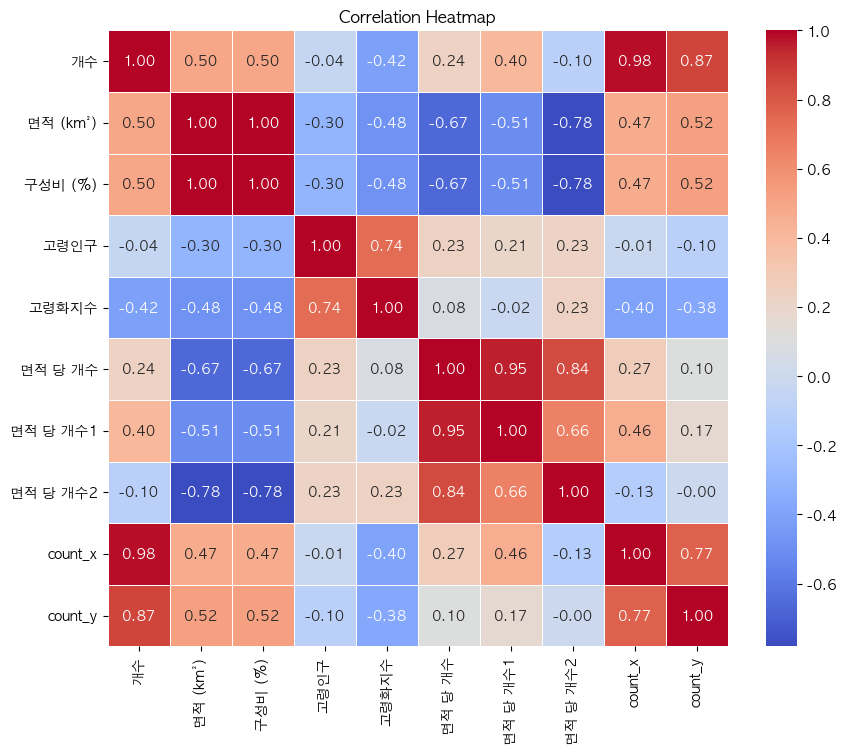

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation = merged_facility.iloc[:, 1:].corr()

# Heatmap 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

### ----

In [239]:
merged_facility

,SIGNGU_NM,개수,면적 (km²),구성비 (%),고령인구,고령화지수,면적 당 개수
0,노원구,306,35.44,5.86,18.9,196,8.634312
1,강서구,267,41.45,6.85,17.7,192.5,6.441496
2,구로구,239,20.12,3.32,19.8,224,11.878728
3,성북구,225,24.58,4.06,18.1,193.5,9.153784
4,영등포구,222,24.55,4.06,17.8,210.7,9.042770
5,양천구,217,17.41,2.88,17.2,153.7,12.464101
6,송파구,210,33.88,5.6,16.4,145.8,6.198347
7,은평구,206,29.71,4.91,19.9,224.4,6.933692
8,도봉구,197,20.65,3.41,22.6,278.5,9.539952
9,마포구,189,23.85,3.94,15.4,168.6,7.924528


In [94]:
merged_facility.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

array(['양천구', '구로구', '동대문구', '성동구', '중랑구', '동작구', '도봉구', '성북구', '영등포구',
       '중구', '서대문구', '노원구', '마포구', '금천구', '광진구', '강동구', '은평구', '강서구',
       '용산구', '송파구', '강북구', '관악구', '종로구', '강남구', '서초구'], dtype=object)

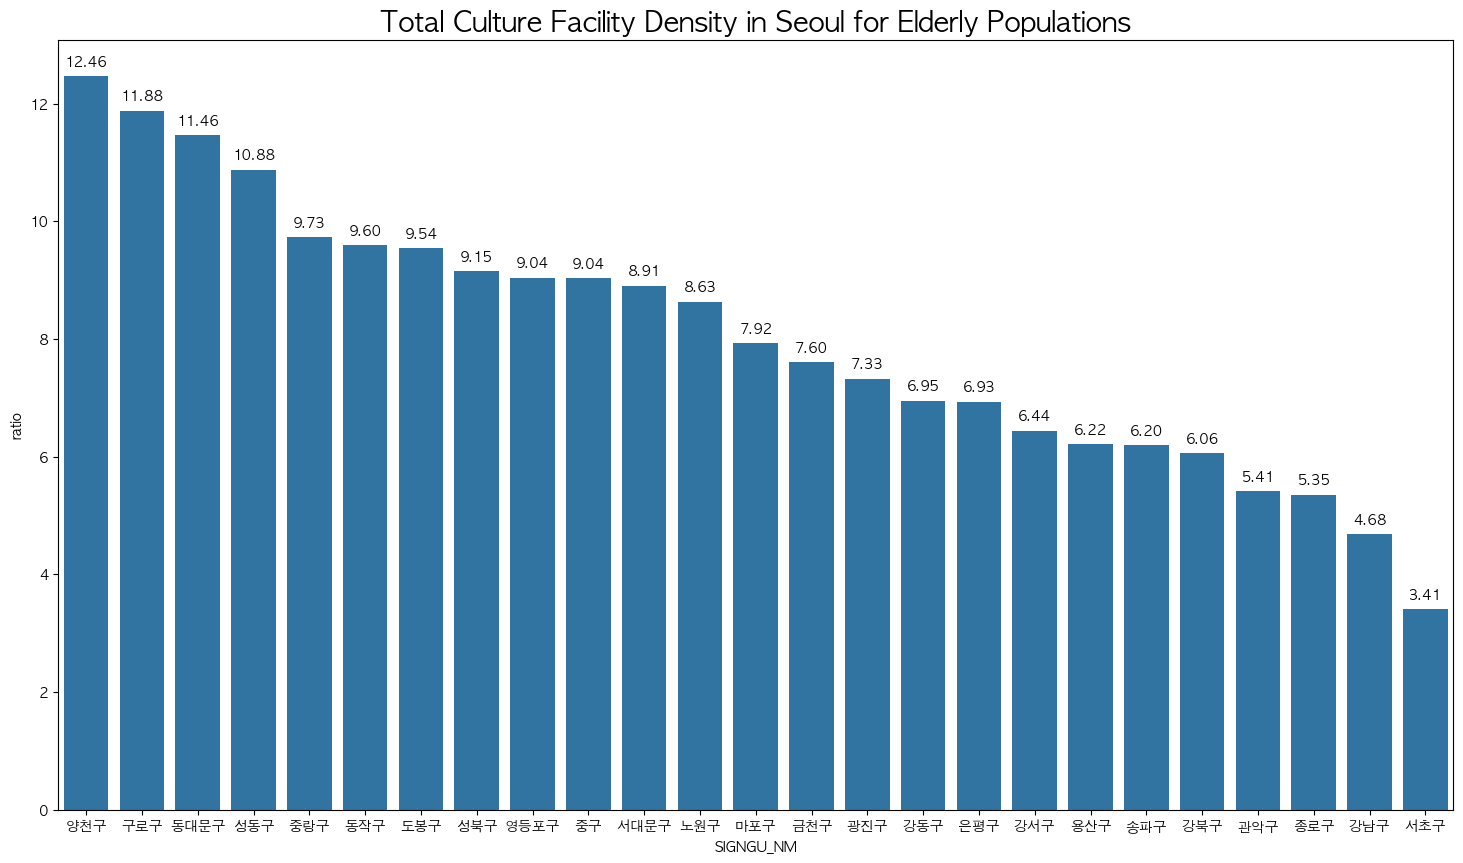

In [97]:
order = merged_facility.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=merged_facility, x='SIGNGU_NM', y='ratio', order=order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 소수점 두 자리까지만 표시
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Total Culture Facility Density in Seoul for Elderly Populations", fontdict={'fontsize' : 20})
plt.show()

* 양천구 -> 구로구 -> 동대문구 -> 성동구 -> 동작구

* 서초구 -> 종로구 -> 관악구 -> 강북구 -> 강남구

### Ageing index

In [1]:
# old_point.head()

In [2]:
# sorted_order = old_point.sort_values(by='합계', ascending=False)['구별']

# plt.figure(figsize=(18, 10))
# ax = sns.barplot(data=old_point, x='구별', y='합계', order=sorted_order)
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='bottom', 
#                 fontsize=10, color='black', 
#                 xytext=(0, 5), 
#                 textcoords='offset points')
# plt.title("Ageing index")
# plt.show()

### Elderly dependency rate

In [147]:
old_pop.head()

,구별,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


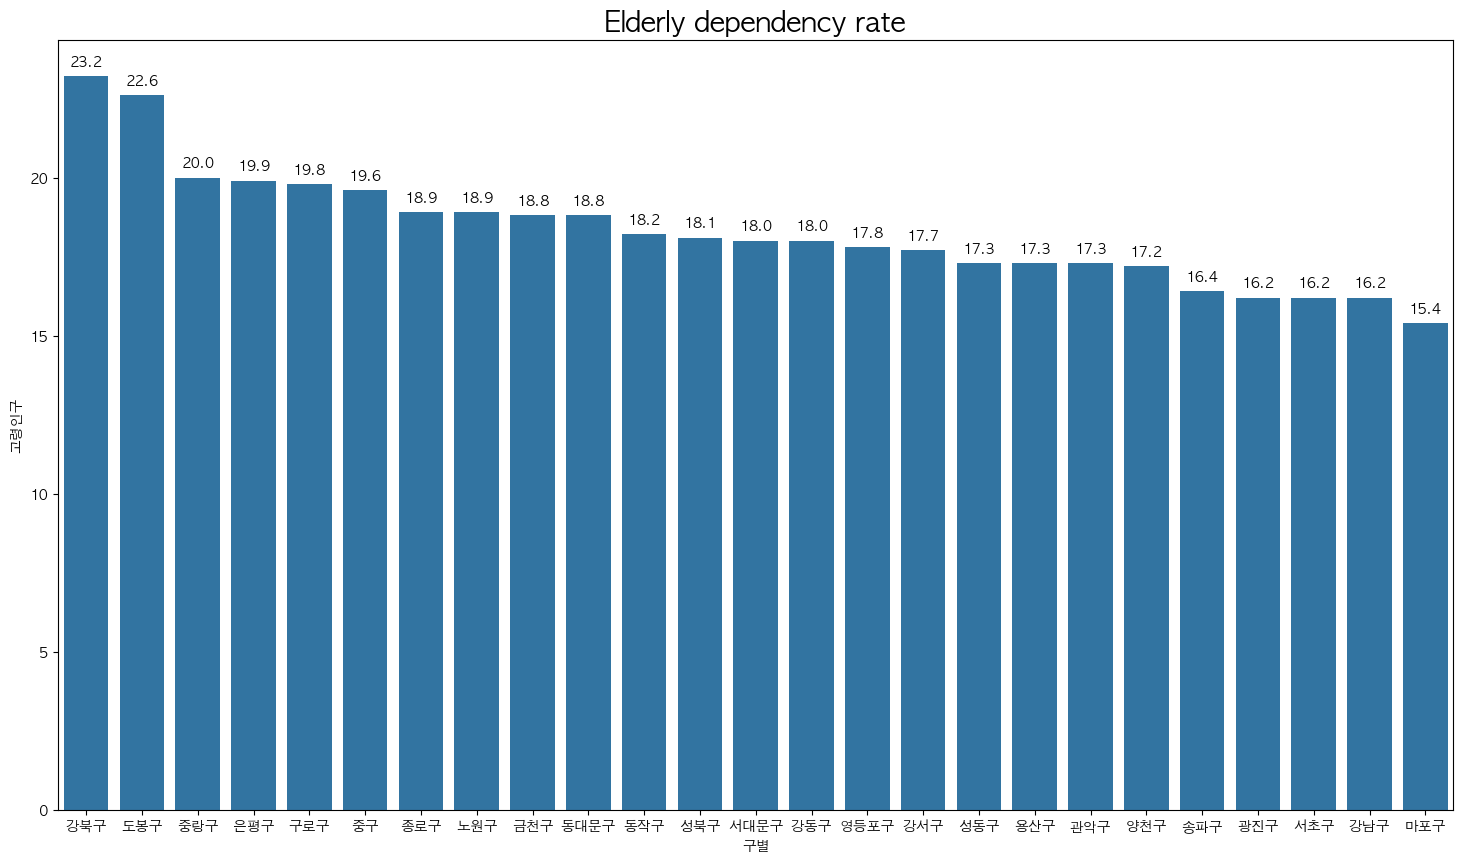

In [ ]:
sorted_order = old_pop.sort_values(by='고령인구', ascending=False)['구별']

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=old_pop, x='구별', y='고령인구', order=sorted_order)
for p in ax.patches:
    ax.annotate(f'{float(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.title("Elderly dependency rate", fontdict={'fontsize' : 20})
plt.show()

* 강북구 -> 도봉구 -> 중랑구 -> 구로구 -> 중구
* 마포구 -> 강남구 -> 서초구 -> 광진구 -> 송파구